# 1. 문제정의
- 500명의 키와 몸무게, 비만도 라벨을 통해서 비만을 판단하는 모델을 만들어보자

# 2.데이터수집
- bmi_500.csv불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
data = pd.read_csv('bmi_500.csv',
           index_col = 'Label') #label컬럼 인덱스로 만들기
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [3]:
#인덱서를 사용해서
#label이 normal인것만 출력하기

#인덱서 : 데이터 프레임에서 행 / 열단위로 데이터를 불러오기
#loc인덱서 : [행,열] 행과 열에 대한 이름 data.loc['Overweight','Height']
#iloc인덱서 : [행,열] 행과 열에 대한 번호 data.iloc[3,1]

In [4]:
data.loc['Normal',:]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


# 3.데이터 전처리 

In [5]:
#결측지, 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [6]:
#기술통계 확인, 이상치의 여부확인
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4.탐색적 데이터 분석(EDA)
- 각 비만도 등급별로 시각화

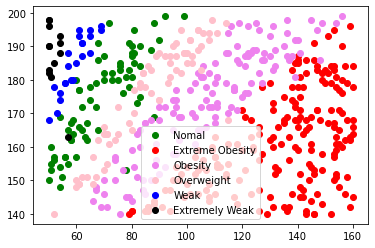

In [7]:
#normal 만 시각화
data_normal = data.loc['Normal',:]
plt.scatter(data_normal['Weight'], #X축 데이터
           data_normal['Height'],  #Y축 데이터
           c = 'green',
           label = 'Nomal')
data_ExtremeObesity = data.loc['Extreme Obesity',:]
plt.scatter(data_ExtremeObesity['Weight'], #X축 데이터
           data_ExtremeObesity['Height'],  #Y축 데이터
           c = 'red',
           label = 'Extreme Obesity')
data_Obesity = data.loc['Obesity',:]
plt.scatter(data_Obesity['Weight'], #X축 데이터
           data_Obesity['Height'],  #Y축 데이터
           c = 'violet',
           label = 'Obesity')
data_Overweight = data.loc['Overweight',:]
plt.scatter(data_Overweight['Weight'], #X축 데이터
           data_Overweight['Height'],  #Y축 데이터
           c = 'pink',
           label = 'Overweight')
data_Weak = data.loc['Weak',:]
plt.scatter(data_Weak['Weight'], #X축 데이터
           data_Weak['Height'],  #Y축 데이터
           c = 'blue',
           label = 'Weak')
data_ExtremelyWeak = data.loc['Extremely Weak',:]
plt.scatter(data_ExtremelyWeak['Weight'], #X축 데이터
           data_ExtremelyWeak['Height'],  #Y축 데이터
           c = 'black',
           label = 'Extremely Weak')
plt.legend() #label 띄우기
plt.show()

In [8]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [9]:
def drawScatter(label,color) :
    data_scatter = data.loc[label, :]
    plt.scatter(data_scatter['Weight'],
               data_scatter['Height'],
               c=color,
               label = label)

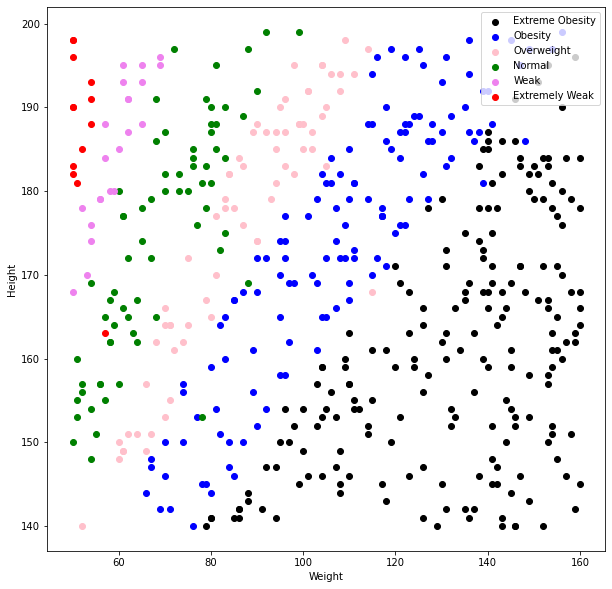

In [10]:
#'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak','Extremely Weak'
plt.figure(figsize = (10,10)) # 그래프 크기
drawScatter('Extreme Obesity', 'black') #scatter는 점을 찍는다
drawScatter('Obesity', 'blue')
drawScatter('Overweight','pink')
drawScatter('Normal','green')
drawScatter('Weak','violet')
drawScatter('Extremely Weak','red')


plt.legend(loc='upper right')
plt.xlabel('Weight') #X축 이름 : Weight
plt.ylabel('Height') #Y축 이름 : Height
plt.show()

# 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [11]:
#문제/정답
data = pd.read_csv('bmi_500.csv')
X = data.loc[ :, 'Height' : 'Weight']
y = data.loc[ :, 'Label']

In [12]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [13]:
#훈련/평가
#70/30
#350/150
X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [14]:
# knn 모델 사용
knn = KNeighborsClassifier(n_neighbors = 7)

# 6.학습

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# 7.평가

In [17]:
print('train score : ', knn.score(X_train,y_train))
print('test score : ', knn.score(X_test,y_test))

train score :  0.9028571428571428
test score :  0.9


In [18]:
knn.predict([[174,67],[180,80]])

array(['Normal', 'Overweight'], dtype=object)